my reference for creating this recommender system model (thank you Heeral Dedhia!): [https://www.kaggle.com/heeraldedhia/movie-ratings-and-recommendation-using-knn](https://www.kaggle.com/heeraldedhia/movie-ratings-and-recommendation-using-knn "Movie Ratings and Recommendation using KNN")

In [1]:
# import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import operator
import random as rand

In [2]:
# functions
def str_to_list(df, col):
    """
    Function to format datatypes in all columns of a 
    dataframe into a list

    Parameters:
    -----------
    df: The dataframe

    col: Columns that needs to be formatted
    """
    for c in col:
        if c:
            try:
                df[c] = df[c].apply(lambda x: x.split(
                    ", ") if x != False and isinstance(x, str) else False)
            except AttributeError:
                df[c] = df[c].apply(lambda x: str(
                    x).split(", ") if x else False)
                df[c] = df[c].apply(lambda x: list(
                    map(int, x)) if x else False)

    return df


def remove_duplicates(x):
    """
    Function to remove duplicates in a list

    Parameters:
    -----------
    x: The list
    """
    # x = x.apply(lambda x: x.split(", "))
    x = x.explode()
    x = x.drop_duplicates()
    return set(x)


def binary(xList, yList):
    """
    One Hot Encoding
    """
    zList = []

    for x in xList:
        if yList != False and x in yList:
            zList.append(1)
        else:
            zList.append(0)

    return zList


def top_graph(df, name):

    lists = []
    for i in df:
        lists.extend(i)
    ax = pd.Series(lists).value_counts()[:25].sort_values(
        ascending=True).plot.barh(color=sns.color_palette('hls', 10))
    plt.title('Top ' + name)
    plt.show()


In [28]:
# import dataset
dir_path = os.getcwd()
xls = pd.ExcelFile(dir_path + "/datasets/raw_dataset.xlsx")
raw_museums = pd.read_excel(xls, "Sheet1")

# Exploration

In [4]:
# show first 5 rows of data
raw_museums.head(5)

,name,category,schedule_1,schedule_name_1,open_1,closed_1,schedule_2,schedule_name_2,open_2,closed_2,...,twitter,ticket_1,ticket_price_1,ticket_2,ticket_name_2,ticket_price_2,public_transportation,distance_to_museum,latitude,longitude
0,Art: 1 New Museum,Seni,"Selasa, Rabu, Kamis, Jumat, Sabtu",NaN,10:00,20:00,Minggu,NaN,10:00,16:00,...,art1_newmuseum,"Wisatawan Mancanegara, Umum, Pelajar, Anak - Anak","125000, 100000, 75000, 0",NaN,NaN,NaN,"Bandara Halim Perdanakusuma, Stasiun Rajawali,...","26.9, 0.75, 3.2, 4.4, 5.7",-6.146950,106.840289
1,Bayt Al-Qur’an dan Museum Istiqlal,Agama,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",NaN,08:30,15:00,NaN,NaN,NaN,NaN,...,bqmitmii,Umum,0,NaN,NaN,NaN,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","45, 10, 20.4, 22.6, 13, 4.3",-6.302798,106.887863
2,Galeri Foto Jurnalistik Antara,Sejarah,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",NaN,10:00,20:00,NaN,NaN,NaN,NaN,...,NaN,Umum,0,NaN,NaN,NaN,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","29, 14, 1, 3, 3",-6.165897,106.833967
3,Galeri Nasional Indonesia,Seni,"Selasa, Rabu, Kamis, Jumat",Pameran Tetap,09:00,16:00,"Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",Pameran Temporer,10:00,19:00,...,galerinasional_,Umum,0,NaN,NaN,NaN,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","28.6, 20.4, 22.7, 13.3",-6.178550,106.832772
4,Monumen Nasional,Sejarah,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",Pelataran Puncak Sesi 1,08:00,16:00,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",Pelataran Puncak Sesi 2,19:00,22:00,...,NaN,"Dewasa, Anak - Anak","20000, 10000","Dewasa, Anak - Anak",Pelataran Puncak,"7500, 3500","Stasiun Gambir, Stasiun Pasar Senen, Terminal ...","0.85, 3, 4, 4, 16, 30",-6.175394,106.827152


In [5]:
# show columns
raw_museums.columns

Index(['name', 'category', 'schedule_1', 'schedule_name_1', 'open_1',
       'closed_1', 'schedule_2', 'schedule_name_2', 'open_2', 'closed_2',
       'schedule_3', 'schedule_name_3', 'open_3', 'closed_3', 'address',
       'city', 'phone_number', 'email', 'website', 'facebook', 'instagram',
       'twitter', 'ticket_1', 'ticket_price_1', 'ticket_2', 'ticket_name_2',
       'ticket_price_2', 'public_transportation', 'distance_to_museum',
       'latitude', 'longitude'],
      dtype='object')

In [6]:
# drop columns
raw_museums.drop(["schedule_name_1", "schedule_2", "schedule_name_2", "schedule_3", "schedule_name_3", "ticket_2", "ticket_name_2", "ticket_price_2", "address", "phone_number", "email", "website", "facebook", "instagram", "twitter", "latitude", "longitude", "open_2", "closed_2", "open_3", "closed_3"], axis=1, inplace=True)
museums = raw_museums.copy()
museums.columns

Index(['name', 'category', 'schedule_1', 'open_1', 'closed_1', 'city',
       'ticket_1', 'ticket_price_1', 'public_transportation',
       'distance_to_museum'],
      dtype='object')

In [7]:
# describe dataset
museums.describe()

,name,category,schedule_1,open_1,closed_1,city,ticket_1,ticket_price_1,public_transportation,distance_to_museum
count,61,61,60,60,60,61,61,61,61,61
unique,61,7,12,7,10,5,18,28,35,61
top,Art: 1 New Museum,Sejarah,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",08:00,16:00,Jakarta Pusat,Umum,0,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","26.9, 0.75, 3.2, 4.4, 5.7"
freq,1,26,23,26,31,21,35,20,10,1


## String to List categorical column

In [8]:
museums.fillna(False, inplace=True)
museums = str_to_list(museums, ["category", "open_1", "closed_1", "city", "schedule_1", "ticket_1", "ticket_price_1", "public_transportation", "distance_to_museum"])

In [9]:
museums.head(5)

,name,category,schedule_1,open_1,closed_1,city,ticket_1,ticket_price_1,public_transportation,distance_to_museum
0,Art: 1 New Museum,[Seni],"[Selasa, Rabu, Kamis, Jumat, Sabtu]",[10:00],[20:00],[Jakarta Pusat],"[Wisatawan Mancanegara, Umum, Pelajar, Anak - ...","[125000, 100000, 75000, 0]","[Bandara Halim Perdanakusuma, Stasiun Rajawali...","[26.9, 0.75, 3.2, 4.4, 5.7]"
1,Bayt Al-Qur’an dan Museum Istiqlal,[Agama],"[Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu]",[08:30],[15:00],[Jakarta Timur],[Umum],False,"[Bandara Soekarno - Hatta, Bandara Halim Perda...","[45, 10, 20.4, 22.6, 13, 4.3]"
2,Galeri Foto Jurnalistik Antara,[Sejarah],"[Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu]",[10:00],[20:00],[Jakarta Pusat],[Umum],False,"[Bandara Soekarno - Hatta, Bandara Halim Perda...","[29, 14, 1, 3, 3]"
3,Galeri Nasional Indonesia,[Seni],"[Selasa, Rabu, Kamis, Jumat]",[09:00],[16:00],[Jakarta Pusat],[Umum],False,"[Bandara Soekarno - Hatta, Bandara Halim Perda...","[28.6, 20.4, 22.7, 13.3]"
4,Monumen Nasional,[Sejarah],"[Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu]",[08:00],[16:00],[Jakarta Pusat],"[Dewasa, Anak - Anak]","[20000, 10000]","[Stasiun Gambir, Stasiun Pasar Senen, Terminal...","[0.85, 3, 4, 4, 16, 30]"


In [10]:
museums.iloc[25]

name                                                      Museum Indonesia
category                                                         [Sejarah]
schedule_1               [Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, Min...
open_1                                                             [09:00]
closed_1                                                           [16:00]
city                                                       [Jakarta Timur]
ticket_1                                                            [Umum]
ticket_price_1                                                       False
public_transportation    [Bandara Soekarno - Hatta, Bandara Halim Perda...
distance_to_museum                         [45.9, 10.2, 22.2, 20, 5.6, 15]
Name: 25, dtype: object

In [11]:
museums.shape

(61, 10)

In [12]:
museums.size

610

In [13]:
museums.index

RangeIndex(start=0, stop=61, step=1)

In [14]:
museums.dtypes

name                     object
category                 object
schedule_1               object
open_1                   object
closed_1                 object
city                     object
ticket_1                 object
ticket_price_1           object
public_transportation    object
distance_to_museum       object
dtype: object

## Working with Schedules

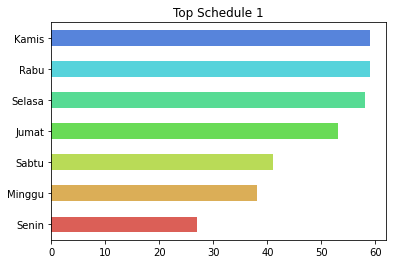

In [15]:
# Top schedule 1
schedule_1 = museums.filter(["schedule_1"], axis=1)
schedule_1.drop(schedule_1.index[schedule_1['schedule_1'] == False], inplace=True)
top_graph(schedule_1["schedule_1"], "Schedule 1")

## Generate sorted scheduleList

In [16]:
schedule_list = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]

## One hot encoding for multiple labels for all schedules

In [17]:
museums["schedule_1_bin"] = museums["schedule_1"].apply(lambda x : binary(schedule_list, x))

In [18]:
museums["schedule_1_bin"].head()

0    [0, 1, 1, 1, 1, 1, 0]
1    [0, 1, 1, 1, 1, 1, 1]
2    [0, 1, 1, 1, 1, 1, 1]
3    [0, 1, 1, 1, 1, 0, 0]
4    [0, 1, 1, 1, 1, 1, 1]
Name: schedule_1_bin, dtype: object

## Working with ticket category

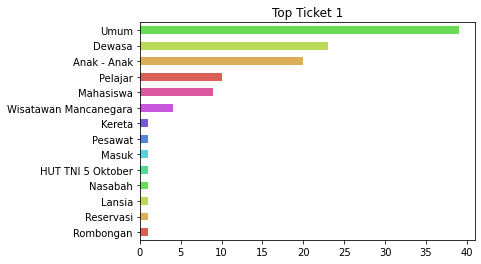

In [19]:
ticket_1 = museums.filter(["ticket_1"], axis=1)
ticket_1.drop(ticket_1.index[ticket_1['ticket_1'] == False], inplace=True)
top_graph(ticket_1["ticket_1"], "Ticket 1")

## Generate sorted ticket category

In [20]:
ticket_list = list(remove_duplicates(ticket_1["ticket_1"]))
ticket_list.sort()
ticket_list

['Anak - Anak',
 'Dewasa',
 'HUT TNI 5 Oktober',
 'Kereta',
 'Lansia',
 'Mahasiswa',
 'Masuk',
 'Nasabah',
 'Pelajar',
 'Pesawat',
 'Reservasi',
 'Rombongan',
 'Umum',
 'Wisatawan Mancanegara']

## One hot encoding for multiple labels for all ticket category

In [21]:
museums["ticket_1_bin"] = museums["ticket_1"].apply(lambda x : binary(ticket_list, x))

In [22]:
museums["ticket_1_bin"].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
4    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Name: ticket_1_bin, dtype: object

## Working with ticket prices

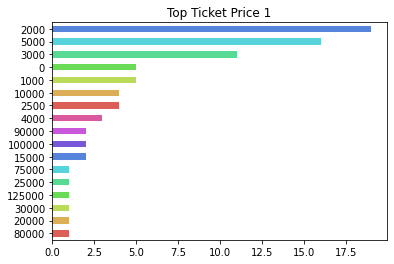

In [23]:
ticket_price_1 = museums.filter(["ticket_price_1"], axis=1)
ticket_price_1.drop(ticket_price_1.index[ticket_price_1['ticket_price_1'] == False], inplace=True)
top_graph(ticket_price_1["ticket_price_1"], "Ticket Price 1")

## Generate sorted ticket prices

In [24]:
ticket_price_list = list(map(int, remove_duplicates(ticket_price_1["ticket_price_1"])))
ticket_price_list.sort()
ticket_price_list

[0,
 1000,
 2000,
 2500,
 3000,
 4000,
 5000,
 10000,
 15000,
 20000,
 25000,
 30000,
 75000,
 80000,
 90000,
 100000,
 125000]

## One hot encoding for multiple labels for all ticket prices

In [25]:
museums["ticket_price_1_bin"] = museums["ticket_price_1"].apply(lambda x : binary(ticket_price_list, x))

In [26]:
museums["ticket_price_1_bin"].head()

0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: ticket_price_1_bin, dtype: object

## Working with public transportation

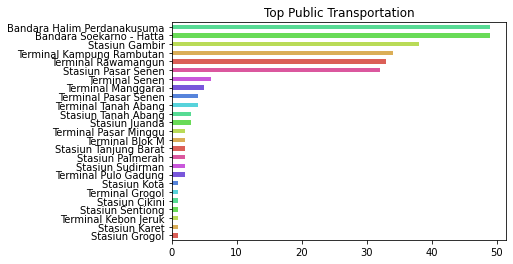

In [27]:
public_transportation = museums.filter(["public_transportation"], axis=1)
public_transportation.drop(public_transportation.index[public_transportation['public_transportation'] == False], inplace=True)
top_graph(public_transportation["public_transportation"], "Public Transportation")

## Generate sorted public transportation

In [28]:
transportation_list = list(remove_duplicates(public_transportation["public_transportation"]))
transportation_list.sort()
transportation_list

['Bandara Halim Perdanakusuma',
 'Bandara Soekarno - Hatta',
 'Stasiun Cawang',
 'Stasiun Cikini',
 'Stasiun Gambir',
 'Stasiun Gondangdia',
 'Stasiun Grogol',
 'Stasiun Jakarta Utara',
 'Stasiun Juanda',
 'Stasiun Karet',
 'Stasiun Kemayoran',
 'Stasiun Kota',
 'Stasiun Manggarai',
 'Stasiun Palmerah',
 'Stasiun Pasar Minggu',
 'Stasiun Pasar Senen',
 'Stasiun Rajawali',
 'Stasiun Sawah Besar',
 'Stasiun Senen',
 'Stasiun Sentiong',
 'Stasiun Sudirman',
 'Stasiun Tanah Abang',
 'Stasiun Tanjung Barat',
 'Stasiun Tebet',
 'Terminal Blok M',
 'Terminal Grogol',
 'Terminal Kalideres',
 'Terminal Kampung Melayu',
 'Terminal Kampung Rambutan',
 'Terminal Kebon Jeruk',
 'Terminal Manggarai',
 'Terminal Pasar Minggu',
 'Terminal Pasar Senen',
 'Terminal Pulo Gadung',
 'Terminal Rawamangun',
 'Terminal Senen',
 'Terminal Tanah Abang']

## One hot encoding for multiple labels for public transportation

In [29]:
museums["public_transportation_bin"] = museums["public_transportation"].apply(lambda x : binary(transportation_list, x))

In [30]:
museums["public_transportation_bin"].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
1    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: public_transportation_bin, dtype: object

## Working with public transportation distance to museums

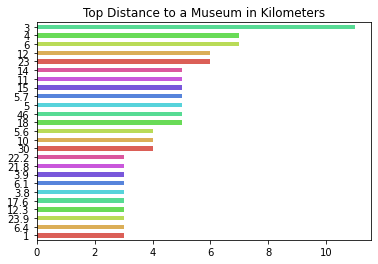

In [31]:
distance_to_museum = museums.filter(["distance_to_museum"], axis=1)
distance_to_museum.drop(distance_to_museum.index[distance_to_museum['distance_to_museum'] == False], inplace=True)
top_graph(distance_to_museum["distance_to_museum"], "Distance to a Museum in Kilometers")

## Generate sorted distance

In [32]:
distance_list = list(map(float, remove_duplicates(distance_to_museum["distance_to_museum"])))
distance_list.sort()
distance_list

[0.4,
 0.5,
 0.75,
 0.8,
 0.85,
 1.0,
 1.2,
 1.9,
 2.0,
 2.3,
 2.6,
 2.7,
 2.8,
 3.0,
 3.1,
 3.2,
 3.3,
 3.5,
 3.6,
 3.8,
 3.9,
 4.0,
 4.1,
 4.3,
 4.4,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.3,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.1,
 6.4,
 6.6,
 6.7,
 6.8,
 6.9,
 7.0,
 7.5,
 7.6,
 8.0,
 8.2,
 8.3,
 8.8,
 9.0,
 9.2,
 10.0,
 10.2,
 10.3,
 10.5,
 10.6,
 10.8,
 10.9,
 11.0,
 11.1,
 11.2,
 11.8,
 11.9,
 12.0,
 12.3,
 12.6,
 12.7,
 13.0,
 13.2,
 13.3,
 13.4,
 13.6,
 13.8,
 13.9,
 14.0,
 14.1,
 14.7,
 15.0,
 15.1,
 16.0,
 16.1,
 16.3,
 16.4,
 16.8,
 17.6,
 17.7,
 18.0,
 18.1,
 18.2,
 18.3,
 18.6,
 19.0,
 19.5,
 19.7,
 19.9,
 20.0,
 20.3,
 20.4,
 20.8,
 20.9,
 21.0,
 21.1,
 21.3,
 21.5,
 21.6,
 21.7,
 21.8,
 22.0,
 22.1,
 22.2,
 22.3,
 22.6,
 22.7,
 23.0,
 23.6,
 23.8,
 23.9,
 24.0,
 24.1,
 24.2,
 24.3,
 24.4,
 24.9,
 25.0,
 25.2,
 25.8,
 26.0,
 26.2,
 26.9,
 27.0,
 27.2,
 27.8,
 28.0,
 28.2,
 28.6,
 29.0,
 29.4,
 29.6,
 29.9,
 30.0,
 30.7,
 30.8,
 31.0,
 31.4,
 31.7,
 31.8,
 31.9,
 32.0,
 33.0,
 33.3,

## One hot encoding for multiple labels for distance

In [33]:
museums["distance_bin"] = museums["distance_to_museum"].apply(lambda x : binary(distance_list, list(map(float, x))))

In [34]:
museums["distance_bin"].head()

0    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
Name: distance_bin, dtype: object

## Working with category

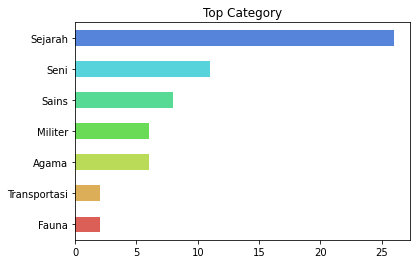

In [35]:
category = museums.filter(["category"], axis=1)
category.drop(category.index[category['category'] == False], inplace=True)
top_graph(category["category"], "Category")

## Generate sorted category

In [36]:
category_list = list(remove_duplicates(category["category"]))
category_list.sort()
category_list

['Agama', 'Fauna', 'Militer', 'Sains', 'Sejarah', 'Seni', 'Transportasi']

## One hot encoding for multiple labels for category

In [37]:
museums["category_bin"] = museums["category"].apply(lambda x : binary(category_list, x))

In [38]:
museums["category_bin"].head()

0    [0, 0, 0, 0, 0, 1, 0]
1    [1, 0, 0, 0, 0, 0, 0]
2    [0, 0, 0, 0, 1, 0, 0]
3    [0, 0, 0, 0, 0, 1, 0]
4    [0, 0, 0, 0, 1, 0, 0]
Name: category_bin, dtype: object

## Working with open time

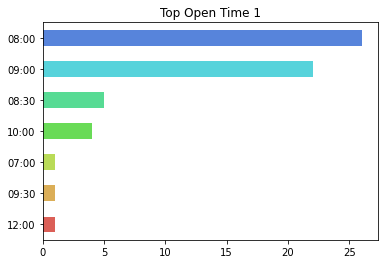

In [39]:
open_1 = museums.filter(["open_1"], axis=1)
open_1.drop(open_1.index[open_1['open_1'] == False], inplace=True)
top_graph(open_1["open_1"], "Open Time 1")

## Generate sorted open time

In [40]:
open_list = list(remove_duplicates(open_1["open_1"]))
open_list.sort()
open_list

['07:00', '08:00', '08:30', '09:00', '09:30', '10:00', '12:00']

## One hot encoding for multiple labels for open time

In [41]:
museums["open_1_bin"] = museums["open_1"].apply(lambda x : binary(open_list, x))

## Working with close time

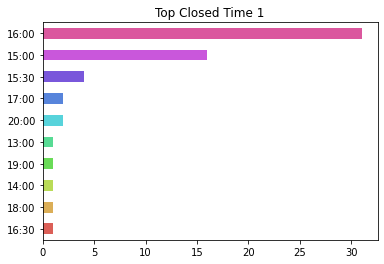

In [42]:
closed_1 = museums.filter(["closed_1"], axis=1)
closed_1.drop(closed_1.index[closed_1['closed_1'] == False], inplace=True)
top_graph(closed_1["closed_1"], "Closed Time 1")

## Generate sorted closed time

In [43]:
closed_list = list(remove_duplicates(closed_1["closed_1"]))
closed_list.sort()
closed_list

['13:00',
 '14:00',
 '15:00',
 '15:30',
 '16:00',
 '16:30',
 '17:00',
 '18:00',
 '19:00',
 '20:00']

## One hot encoding for multiple labels for closed time

In [44]:
museums["closed_1_bin"] = museums["closed_1"].apply(lambda x : binary(closed_list, x))

In [45]:
museums["closed_1_bin"].head()

0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
1    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
3    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
4    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Name: closed_1_bin, dtype: object

## Working with city

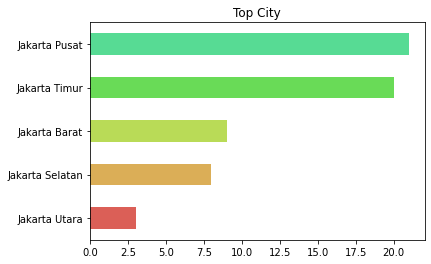

In [46]:
city = museums.filter(["city"], axis=1)
city.drop(category.index[city['city'] == False], inplace=True)
top_graph(city["city"], "City")

## Generate sorted city

In [47]:
city_list = list(remove_duplicates(city["city"]))
city_list.sort()
city_list

['Jakarta Barat',
 'Jakarta Pusat',
 'Jakarta Selatan',
 'Jakarta Timur',
 'Jakarta Utara']

## One hot encoding for multiple labels for city

In [48]:
museums["city_bin"] = museums["city"].apply(lambda x : binary(city_list, x))

In [49]:
museums["city_bin"].head()

0    [0, 1, 0, 0, 0]
1    [0, 0, 0, 1, 0]
2    [0, 1, 0, 0, 0]
3    [0, 1, 0, 0, 0]
4    [0, 1, 0, 0, 0]
Name: city_bin, dtype: object

# Experiment

In [50]:
museums.columns

Index(['name', 'category', 'schedule_1', 'open_1', 'closed_1', 'city',
       'ticket_1', 'ticket_price_1', 'public_transportation',
       'distance_to_museum', 'schedule_1_bin', 'ticket_1_bin',
       'ticket_price_1_bin', 'public_transportation_bin', 'distance_bin',
       'category_bin', 'open_1_bin', 'closed_1_bin', 'city_bin'],
      dtype='object')

In [51]:
# drop unused columns
new_museums = museums.copy()
new_museums.drop(["category", "city", "open_1", "closed_1", "schedule_1", "ticket_1", "ticket_price_1", "public_transportation", "distance_to_museum"], axis=1, inplace=True)
new_museums.head()

,name,schedule_1_bin,ticket_1_bin,ticket_price_1_bin,public_transportation_bin,distance_bin,category_bin,open_1_bin,closed_1_bin,city_bin
0,Art: 1 New Museum,"[0, 1, 1, 1, 1, 1, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 1, 0, 0, 0]"
1,Bayt Al-Qur’an dan Museum Istiqlal,"[0, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 0]"
2,Galeri Foto Jurnalistik Antara,"[0, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 1, 0, 0, 0]"
3,Galeri Nasional Indonesia,"[0, 1, 1, 1, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0]"
4,Monumen Nasional,"[0, 1, 1, 1, 1, 1, 1]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 1, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0]"


## Cosine Similarity Function

In [52]:
def cosine_distance(museum_id_1, museum_id_2):
    """
    Search similarity with cosine distance
    """
    a = new_museums.iloc[museum_id_1]
    b = new_museums.iloc[museum_id_2]
    distance = 0

    def cosine(point1, point2):
        w = 0
        x = 0
        y = 0
        z = 0
        for i in range(len(point1)):
            x += (point1[i] * point2[i])
            y += math.pow(point1[i], 2)
            z += math.pow(point2[i], 2)
        w = (math.sqrt(y) * math.sqrt(z))
        return 1 - (x / w) if w != 0 else 0

    for col, val in a.iteritems():
        if col != "name":
            distance += cosine(a[col], b[col])

    return distance


## Euclidean Distance Function

In [53]:
def euclidean_distance(museum_id_1, museum_id_2):
    """
    Search similarity with euclidean distance
    """
    a = new_museums.iloc[museum_id_1]
    b = new_museums.iloc[museum_id_2]
    distance = 0

    def euclidean(point1, point2):
        sum_squared_distance = 0
        for i in range(len(point1)):
            sum_squared_distance += math.pow(point1[i] - point2[i], 2)
        return math.sqrt(sum_squared_distance)

    for col, val in a.iteritems():
        if col != "name":
            distance += euclidean(a[col], b[col])

    return distance


## Recommender

In [54]:
def recommender(name, distance_fn):
    pred_museum = new_museums[new_museums["name"].str.contains(
        name)].iloc[0].to_frame().T

    def knn(base, K):
        distances = []

        for idx, museum in new_museums.iterrows():
            if idx != base.index[0]:
                dist = distance_fn(base.index[0], idx)
                distances.append((idx, dist))

        distances.sort(key=operator.itemgetter(1))
        neighbors = distances[:K]

        return neighbors

    K = 10
    neighbors = knn(pred_museum, K)

    recommend = []

    for neighbor in neighbors:
        recommend.append([new_museums.iloc[neighbor[0]][0],
                          str(raw_museums.iloc[neighbor[0]][1]),
                          str(raw_museums.iloc[neighbor[0]][2]),
                          str(raw_museums.iloc[neighbor[0]][3]),
                          str(raw_museums.iloc[neighbor[0]][4]),
                          str(raw_museums.iloc[neighbor[0]][5]),
                          str(raw_museums.iloc[neighbor[0]][6]),
                          str(raw_museums.iloc[neighbor[0]][7]),
                          str(raw_museums.iloc[neighbor[0]][8]),
                          str(raw_museums.iloc[neighbor[0]][9]),
                          neighbor[1]])

    col = list(museums.columns[:10])
    col.append("similarity")
    df = pd.DataFrame(data=recommend, columns=col)
    return df
    # return recommend


### Experiment 1

In [55]:
query_1 = raw_museums["name"].iloc[rand.randint(0, 60)]
raw_museums[raw_museums["name"].str.contains(query_1)].iloc[0].to_frame().T

,name,category,schedule_1,open_1,closed_1,city,ticket_1,ticket_price_1,public_transportation,distance_to_museum
23,Museum Hakka Indonesia,Sejarah,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,Umum,0,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","48, 12.3, 15.1, 6.8"


In [56]:
# using cosine similarity
recommender(query_1, cosine_distance)

,name,category,schedule_1,open_1,closed_1,city,ticket_1,ticket_price_1,public_transportation,distance_to_museum,similarity
0,Museum Pusaka,Sejarah,"Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,Umum,10000,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","46.4, 12.3, 22.2, 20, 6.1, 18.1",1.053559
1,Museum Indonesia,Sejarah,"Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,Umum,15000,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","45.9, 10.2, 22.2, 20, 5.6, 15",1.257683
2,Museum BNI 1946,Sejarah,nan,nan,nan,Jakarta Barat,Umum,0,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","22.2, 27.2, 19.5, 31.8",2.000000
3,Museum Serangga,Fauna,"Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,Umum,25000,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","46, 12, 15, 6.1",2.074180
4,Museum Pemadam Kebakaran,Sejarah,"Rabu, Kamis, Jumat, Sabtu, Minggu",08:00,16:00,Jakarta Timur,Umum,0,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","45.3, 11.2, 14, 4.9",2.087129
5,Museum Asmat,Sejarah,"Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",08:30,16:00,Jakarta Timur,Umum,10000,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","44.6, 10.6, 22.6, 20.4, 3.3, 16.3",2.257683
6,Museum Purna Bhakti Pertiwi,Sejarah,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,"Anak - Anak, Dewasa","3000, 5000","Bandara Halim Perdanakusuma, Stasiun Tanjung B...","10.5, 11, 3.2",2.422650
7,Museum Prangko,Sejarah,"Senin, Selasa, Rabu, Kamis, Jumat",08:00,16:00,Jakarta Timur,Umum,5000,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","46, 12, 24, 21.8, 15, 5.7",2.453207
8,Museum Timor Timur,Sejarah,"Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",08:30,16:00,Jakarta Timur,Umum,5000,"Bandara Halim Perdanakusuma, Stasiun Gambir, S...","11, 23, 21, 5",2.574180
9,Museum Olahraga Nasional,Sains,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,"Dewasa, Umum, Pelajar, Mahasiswa","5000, 5000, 3000, 3000","Bandara Soekarno - Hatta, Bandara Halim Perdan...","45.8, 10.2, 24.4, 22.1, 4, 16",2.683503


In [57]:
# using euclidean similarity
recommender(query_1, euclidean_distance)

,name,category,schedule_1,open_1,closed_1,city,ticket_1,ticket_price_1,public_transportation,distance_to_museum,similarity
0,Museum Pemadam Kebakaran,Sejarah,"Rabu, Kamis, Jumat, Sabtu, Minggu",08:00,16:00,Jakarta Timur,Umum,0,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","45.3, 11.2, 14, 4.9",5.242641
1,Museum Pusaka,Sejarah,"Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,Umum,10000,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","46.4, 12.3, 22.2, 20, 6.1, 18.1",5.242641
2,Museum Serangga,Fauna,"Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,Umum,25000,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","46, 12, 15, 6.1",5.242641
3,Museum Indonesia,Sejarah,"Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,Umum,15000,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","45.9, 10.2, 22.2, 20, 5.6, 15",5.576491
4,Museum Purna Bhakti Pertiwi,Sejarah,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,"Anak - Anak, Dewasa","3000, 5000","Bandara Halim Perdanakusuma, Stasiun Tanjung B...","10.5, 11, 3.2",6.109853
5,Museum Penerangan,Sains,"Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",08:00,16:00,Jakarta Timur,Umum,0,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","44.6, 10.6, 13.4, 4.3",6.656854
6,Museum Asmat,Sejarah,"Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",08:30,16:00,Jakarta Timur,Umum,10000,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","44.6, 10.6, 22.6, 20.4, 3.3, 16.3",6.990705
7,Galeri Nasional Indonesia,Seni,"Selasa, Rabu, Kamis, Jumat",09:00,16:00,Jakarta Pusat,Umum,0,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","28.6, 20.4, 22.7, 13.3",7.071068
8,Museum Timor Timur,Sejarah,"Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",08:30,16:00,Jakarta Timur,Umum,5000,"Bandara Halim Perdanakusuma, Stasiun Gambir, S...","11, 23, 21, 5",7.242641
9,Museum Olahraga Nasional,Sains,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,"Dewasa, Umum, Pelajar, Mahasiswa","5000, 5000, 3000, 3000","Bandara Soekarno - Hatta, Bandara Halim Perdan...","45.8, 10.2, 24.4, 22.1, 4, 16",7.722756


### Experiment 2

In [58]:
query_2 = raw_museums["name"].iloc[rand.randint(0, 60)]
raw_museums[raw_museums["name"].str.contains(query_2)].iloc[0].to_frame().T

,name,category,schedule_1,open_1,closed_1,city,ticket_1,ticket_price_1,public_transportation,distance_to_museum
42,Museum Perumusan Naskah Proklamasi,Sejarah,"Selasa, Rabu, Kamis, Sabtu, Minggu",08:00,16:00,Jakarta Pusat,"Dewasa, Anak - Anak","2000, 1000","Bandara Soekarno - Hatta, Bandara Halim Perdan...","30.8, 14, 5.3, 5.9, 20.3, 11.1"


In [59]:
# using cosine similarity
recommender(query_2, cosine_distance)

,name,category,schedule_1,open_1,closed_1,city,ticket_1,ticket_price_1,public_transportation,distance_to_museum,similarity
0,Museum Sumpah Pemuda,Sejarah,"Selasa, Rabu, Kamis, Sabtu, Minggu",08:00,16:00,Jakarta Pusat,"Dewasa, Anak - Anak","2000, 1000","Bandara Soekarno - Hatta, Bandara Halim Perdan...","31.9, 14.7, 1.9, 4.1, 19.7, 10.3",1.000000
1,Monumen Nasional,Sejarah,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",08:00,16:00,Jakarta Pusat,"Dewasa, Anak - Anak","20000, 10000","Stasiun Gambir, Stasiun Pasar Senen, Terminal ...","0.85, 3, 4, 4, 16, 30",1.420462
2,Museum Kebangkitan Nasional,Sejarah,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",08:00,16:00,Jakarta Pusat,"Dewasa, Anak - Anak, Wisatawan Mancanegara","2000, 1000, 10000","Bandara Halim Perdanakusuma, Stasiun Pasar Sen...","15, 1, 1",1.799228
3,Museum Nasional Indonesia,Sejarah,"Selasa, Rabu, Kamis, Jumat",08:00,16:00,Jakarta Pusat,"Dewasa, Anak - Anak, Wisatawan Mancanegara","5000, 2000, 10000","Bandara Soekarno - Hatta, Stasiun Juanda, Stas...","29.6, 3.9, 3.5",2.041279
4,Museum Joang ‘45,Transportasi,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",08:00,16:00,Jakarta Pusat,"Dewasa, Mahasiswa, Anak - Anak","5000, 3000, 2000","Bandara Halim Perdanakusuma, Bandara Soekarno ...","13, 30, 3, 3, 3, 4, 5",2.807722
5,Museum DPR RI,Sejarah,"Senin, Selasa, Rabu, Kamis",08:00,15:00,Jakarta Pusat,Umum,0,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","18, 11, 6.6, 5.1, 14, 10",3.162513
6,Museum Pemadam Kebakaran,Sejarah,"Rabu, Kamis, Jumat, Sabtu, Minggu",08:00,16:00,Jakarta Timur,Umum,0,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","45.3, 11.2, 14, 4.9",3.179379
7,Museum BNI 1946,Sejarah,nan,nan,nan,Jakarta Barat,Umum,0,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","22.2, 27.2, 19.5, 31.8",3.183503
8,Museum Bank Tabungan Negara,Sejarah,"Senin, Selasa, Rabu, Kamis, Jumat",08:00,16:30,Jakarta Pusat,Umum,0,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","26.2, 16.8, 3.6, 5.9, 13.2, 25.8",3.233333
9,Museum Bahari,Sejarah,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",08:00,17:00,Jakarta Utara,"Dewasa, Anak - Anak","2000, 1000","Bandara Soekarno - Hatta, Bandara Halim Perdan...","20.8, 25.8, 24.2, 31.7",3.270632


In [60]:
# using euclidean similarity
recommender(query_2, euclidean_distance)

,name,category,schedule_1,open_1,closed_1,city,ticket_1,ticket_price_1,public_transportation,distance_to_museum,similarity
0,Museum Sumpah Pemuda,Sejarah,"Selasa, Rabu, Kamis, Sabtu, Minggu",08:00,16:00,Jakarta Pusat,"Dewasa, Anak - Anak","2000, 1000","Bandara Soekarno - Hatta, Bandara Halim Perdan...","31.9, 14.7, 1.9, 4.1, 19.7, 10.3",3.464102
1,Monumen Nasional,Sejarah,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",08:00,16:00,Jakarta Pusat,"Dewasa, Anak - Anak","20000, 10000","Stasiun Gambir, Stasiun Pasar Senen, Terminal ...","0.85, 3, 4, 4, 16, 30",6.316625
2,Museum Kebangkitan Nasional,Sejarah,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",08:00,16:00,Jakarta Pusat,"Dewasa, Anak - Anak, Wisatawan Mancanegara","2000, 1000, 10000","Bandara Halim Perdanakusuma, Stasiun Pasar Sen...","15, 1, 1",7.064495
3,Museum Nasional Indonesia,Sejarah,"Selasa, Rabu, Kamis, Jumat",08:00,16:00,Jakarta Pusat,"Dewasa, Anak - Anak, Wisatawan Mancanegara","5000, 2000, 10000","Bandara Soekarno - Hatta, Stasiun Juanda, Stas...","29.6, 3.9, 3.5",7.968119
4,Museum Basoeki Abdullah,Seni,"Selasa, Rabu, Kamis, Jumat",08:00,16:00,Jakarta Selatan,"Dewasa, Anak - Anak","2000, 1000","Bandara Soekarno - Hatta, Bandara Halim Perdan...","34.4, 20.9, 19, 18, 10.8, 21.5",8.024580
5,Museum DPR RI,Sejarah,"Senin, Selasa, Rabu, Kamis",08:00,15:00,Jakarta Pusat,Umum,0,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","18, 11, 6.6, 5.1, 14, 10",8.040593
6,Museum Bank Tabungan Negara,Sejarah,"Senin, Selasa, Rabu, Kamis, Jumat",08:00,16:30,Jakarta Pusat,Umum,0,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","26.2, 16.8, 3.6, 5.9, 13.2, 25.8",8.308542
7,Museum Bahari,Sejarah,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",08:00,17:00,Jakarta Utara,"Dewasa, Anak - Anak","2000, 1000","Bandara Soekarno - Hatta, Bandara Halim Perdan...","20.8, 25.8, 24.2, 31.7",8.404918
8,Museum Alkitab,Agama,"Senin, Selasa, Rabu, Kamis, Jumat",08:00,16:00,Jakarta Pusat,Umum,5000,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","39.8, 9.2, 3.9, 6.1, 18.3, 5.6",8.610366
9,Museum Prangko,Sejarah,"Senin, Selasa, Rabu, Kamis, Jumat",08:00,16:00,Jakarta Timur,Umum,5000,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","46, 12, 24, 21.8, 15, 5.7",8.610366


### Experiment 3

In [61]:
query_3 = raw_museums["name"].iloc[rand.randint(0, 60)]
raw_museums[raw_museums["name"].str.contains(query_3)].iloc[0].to_frame().T

,name,category,schedule_1,open_1,closed_1,city,ticket_1,ticket_price_1,public_transportation,distance_to_museum
31,Museum Keprajuritan,Militer,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,15:30,Jakarta Timur,"Dewasa, Anak - Anak","4000, 2500","Bandara Soekarno - Hatta, Bandara Halim Perdan...","46.4, 12.3, 24.3, 22.1, 6, 18.1"


In [62]:
# using cosine similarity
recommender(query_3, cosine_distance)

,name,category,schedule_1,open_1,closed_1,city,ticket_1,ticket_price_1,public_transportation,distance_to_museum,similarity
0,Museum Mandiri,Sejarah,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,15:30,Jakarta Barat,"Dewasa, Anak - Anak, Nasabah, Wisatawan Mancan...","5000, 2000, 2000, 10000","Bandara Soekarno - Hatta, Bandara Halim Perdan...","21.3, 23.9, 5.7, 7.6, 21.6, 33.9",3.292893
1,Museum Olahraga Nasional,Sains,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,"Dewasa, Umum, Pelajar, Mahasiswa","5000, 5000, 3000, 3000","Bandara Soekarno - Hatta, Bandara Halim Perdan...","45.8, 10.2, 24.4, 22.1, 4, 16",3.479780
2,Monumen Pancasila Sakti,Militer,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",08:00,16:00,Jakarta Timur,"Dewasa, Anak - Anak, Pelajar","4000, 2500, 2500","Bandara Halim Perdanakusuma, Bandara Soekarno ...","11, 53, 23, 23, 23, 23",3.516837
3,Museum Purna Bhakti Pertiwi,Sejarah,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,"Anak - Anak, Dewasa","3000, 5000","Bandara Halim Perdanakusuma, Stasiun Tanjung B...","10.5, 11, 3.2",3.528595
4,Museum Pusaka,Sejarah,"Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,Umum,10000,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","46.4, 12.3, 22.2, 20, 6.1, 18.1",3.574180
5,Museum Hakka Indonesia,Sejarah,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,Umum,0,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","48, 12.3, 15.1, 6.8",3.979379
6,Museum Indonesia,Sejarah,"Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,Umum,15000,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","45.9, 10.2, 22.2, 20, 5.6, 15",4.074180
7,Museum Satriamandala,Militer,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,15:00,Jakarta Selatan,"Dewasa, Mahasiswa, HUT TNI 5 Oktober","4000, 2500, 0","Bandara Halim Perdanakusuma, Stasiun Tanah Aba...","13, 6, 5",4.120347
8,Museum Wayang,Seni,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,15:00,Jakarta Barat,"Dewasa, Mahasiswa, Pelajar, Anak - Anak","5000, 3000, 2000, 2000","Bandara Soekarno - Hatta, Bandara Halim Perdan...","21, 24, 6, 8, 27, 30",4.126227
9,Museum BNI 1946,Sejarah,nan,nan,nan,Jakarta Barat,Umum,0,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","22.2, 27.2, 19.5, 31.8",4.183503


In [63]:
# using euclidean similarity
recommender(query_3, euclidean_distance)

,name,category,schedule_1,open_1,closed_1,city,ticket_1,ticket_price_1,public_transportation,distance_to_museum,similarity
0,Museum Mandiri,Sejarah,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,15:30,Jakarta Barat,"Dewasa, Anak - Anak, Nasabah, Wisatawan Mancan...","5000, 2000, 2000, 10000","Bandara Soekarno - Hatta, Bandara Halim Perdan...","21.3, 23.9, 5.7, 7.6, 21.6, 33.9",7.706742
1,Museum Olahraga Nasional,Sains,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,"Dewasa, Umum, Pelajar, Mahasiswa","5000, 5000, 3000, 3000","Bandara Soekarno - Hatta, Bandara Halim Perdan...","45.8, 10.2, 24.4, 22.1, 4, 16",7.990705
2,Museum Pusaka,Sejarah,"Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,Umum,10000,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","46.4, 12.3, 22.2, 20, 6.1, 18.1",8.009968
3,Museum Purna Bhakti Pertiwi,Sejarah,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,"Anak - Anak, Dewasa","3000, 5000","Bandara Halim Perdanakusuma, Stasiun Tanjung B...","10.5, 11, 3.2",8.064495
4,Museum Hakka Indonesia,Sejarah,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,Umum,0,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","48, 12.3, 15.1, 6.8",8.803119
5,Museum Wayang,Seni,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,15:00,Jakarta Barat,"Dewasa, Mahasiswa, Pelajar, Anak - Anak","5000, 3000, 2000, 2000","Bandara Soekarno - Hatta, Bandara Halim Perdan...","21, 24, 6, 8, 27, 30",8.819132
6,Monumen Pancasila Sakti,Militer,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",08:00,16:00,Jakarta Timur,"Dewasa, Anak - Anak, Pelajar","4000, 2500, 2500","Bandara Halim Perdanakusuma, Bandara Soekarno ...","11, 53, 23, 23, 23, 23",8.828427
7,Museum Indonesia,Sejarah,"Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,16:00,Jakarta Timur,Umum,15000,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","45.9, 10.2, 22.2, 20, 5.6, 15",9.024580
8,Bayt Al-Qur’an dan Museum Istiqlal,Agama,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",08:30,15:00,Jakarta Timur,Umum,0,"Bandara Soekarno - Hatta, Bandara Halim Perdan...","45, 10, 20.4, 22.6, 13, 4.3",9.438793
9,Museum Seni Rupa dan Keramik,Seni,"Selasa, Rabu, Kamis, Jumat, Sabtu, Minggu",09:00,15:00,Jakarta Barat,"Dewasa, Umum, Mahasiswa, Pelajar, Anak - Anak","5000, 5000, 3000, 2000, 2000","Bandara Soekarno - Hatta, Bandara Halim Perdan...","21.6, 25, 8.8, 6.4, 30.7, 24.9",9.438793


from the 3 random experiments, cosine distance more often recommends "Museum BNI 1946" on every occasion, whereas the euclidean distance did not. 